[View in Colaboratory](https://colab.research.google.com/github/PGrabinski/KerasTutorial/blob/master/Chapter3.ipynb)

# Chapter 3: Hands-on
This chapter contains three typical supervised-learning tasks:
1. Binary classification: IMDB postivie/negative reviews
1. Multi classification: Reuters news data and its topics
1. Regression: Boston housing prices

## IMDB reviews
This set contains movie reviews from IMDB. They are highly polarized and the task ist to develope a model discriminating between positive and negative reviews. There are 25k samples in both, the train and the test sets. The reviews are divided $50:50$ into *positive/negative* classes. The input data are sequences of integers where every integer represents a word encoded by a dictionary. To make the task less noisy we take only 10k most frequent words. We can decode one of the reviews to see how it looks.

In [8]:
import numpy as np
from keras.datasets import imdb
(trainData_imdb, trainLabels_imdb), (testData_imdb, testLabels_imdb) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [9]:
# Decoding a review (optional)
wordIndex_imdb = imdb.get_word_index()
reverseWordIndex_imdb = dict( [(value, key) for (key, value) in wordIndex_imdb.items() ])
decodedReview_imdb = ' '.join( [reverseWordIndex_imdb.get(i-3, '?') for i in trainData_imdb[2]])
print(decodedReview_imdb)

1646592/1641221 [==============================] - 0s 0us/step
? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


We transform the input data into binary-valued vectors for each sequence (review). Such a vector encodes the information whether a word with given index appears in the sequence, by this we loose the information about order in the sequence, but it makes our input space much simpler.

In [0]:
def vectorize_imdb(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing the inputs
xTrain_imdb = vectorize_imdb(trainData_imdb)
xTest_imdb = vectorize_imdb(testData_imdb)

# Vectorizing the targets
yTrain_imdb = np.asarray(trainLabels_imdb).astype('float32')
yTest_imdb = np.asarray(testLabels_imdb).astype('float32')

Now, we define our simple densly conected model ending with a single unit layer which gives us probability of one the class encoded as $1$.

In [0]:
from keras import models
from keras import layers

model_imdb = models.Sequential()
model_imdb.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model_imdb.add(layers.Dense(16, activation='relu'))
model_imdb.add(layers.Dense(1, activation='sigmoid'))
model_imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Dividing data into train and validation sets, we teach the network.

In [0]:
xTrainRest_imdb = xTrain_imdb[:10000]
xTrainPart_imdb = xTrain_imdb[10000:]

yTrainRest_imdb = yTrain_imdb[:10000]
yTrainPart_imdb = yTrain_imdb[10000:]

In [13]:
history_imdb = model_imdb.fit(xTrainPart_imdb, yTrainPart_imdb, epochs = 20, batch_size=512, validation_data=(xTrainRest_imdb,yTrainRest_imdb))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_acc

15000/15000 [==============================] - 1s 89us/step - loss: 0.0661 - acc: 0.9821 - val_loss: 0.3635 - val_acc: 0.8782
Epoch 10/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0561 - acc: 0.9853 - val_loss: 0.3843 - val_acc: 0.8792
Epoch 11/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0439 - acc: 0.9893 - val_loss: 0.4153 - val_acc: 0.8779
Epoch 12/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.0381 - acc: 0.9921 - val_loss: 0.4525 - val_acc: 0.8690
Epoch 13/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.0300 - acc: 0.9928 - val_loss: 0.4698 - val_acc: 0.8729
Epoch 14/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.0247 - acc: 0.9945 - val_loss: 0.5023 - val_acc: 0.8726
Epoch 15/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.0175 - acc: 0.9979 - val_loss: 0.5342 - val_acc: 0.8693
Epoch 16/20
15000/15000 [=====================

15000/15000 [==============================] - 1s 87us/step - loss: 0.0075 - acc: 0.9996 - val_loss: 0.6822 - val_acc: 0.8632
Epoch 19/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.0121 - acc: 0.9971 - val_loss: 0.6771 - val_acc: 0.8652
Epoch 20/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.0041 - acc: 0.9999 - val_loss: 0.6900 - val_acc: 0.8657


Now, we can see how did the accuracy and loss function behave.

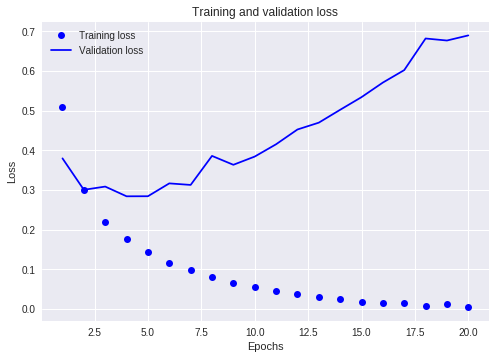

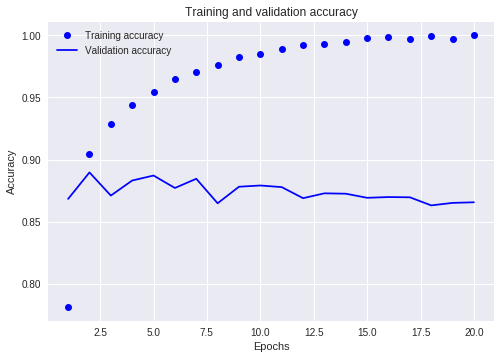

In [14]:
import matplotlib.pyplot as plt

losses_imdb = history_imdb.history['loss']
lossValues_imdb = history_imdb.history['val_loss']

acc_imdb = history_imdb.history['acc']
accValues_imdb = history_imdb.history['val_acc']

epochs_imdb = range(1, len(losses_imdb)+1)

plt.plot(epochs_imdb, losses_imdb, 'bo', label='Training loss')
plt.plot(epochs_imdb, lossValues_imdb, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs_imdb, acc_imdb, 'bo', label='Training accuracy')
plt.plot(epochs_imdb, accValues_imdb, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We see that the network overfits quickly and the validation accuracy drops. We change our learning epochs number parameter to a smaller value. With this newtork we check the test accuracy.

In [18]:
model_imdb2 = models.Sequential()
model_imdb2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_imdb2.add(layers.Dense(16, activation='relu'))
model_imdb2.add(layers.Dense(1, activation='sigmoid'))

model_imdb2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
model_imdb2.fit(xTrain_imdb,yTrain_imdb, epochs=6, batch_size=512)

results_imdb = model_imdb2.evaluate(xTest_imdb,yTest_imdb)
print('The test accuracy of the new model is: {}'.format(results_imdb))

Epoch 1/6
25000/25000 [==============================] - 2s 64us/step - loss: 0.4447 - acc: 0.8280
Epoch 2/6
25000/25000 [==============================] - 1s 56us/step - loss: 0.2591 - acc: 0.9101
Epoch 3/6
25000/25000 [==============================] - 1s 57us/step - loss: 0.1998 - acc: 0.9276
Epoch 4/6
25000/25000 [==============================] - 1s 59us/step - loss: 0.1676 - acc: 0.9399
Epoch 5/6
25000/25000 [==============================] - 1s 58us/step - loss: 0.1427 - acc: 0.9506
Epoch 6/6
25000/25000 [==============================] - 3s 129us/step
The test accuracy of the new model is: [0.32944575251579283, 0.87636]


And we got $87.6\%$ accuracy which is quite high for such a model!

## Reuters news
This is set of $8982$ training samples and $2246$ test samples. There are $46$ topics (classes) and each class has at least $10$ samples in the training set.

In [0]:

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [20]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_news)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


We transform the input data into binary-valued vectors for each sequence (review). Such a vector encodes the information whether a word with given index appears in the sequence, by this we loose the information about order in the sequence, but it makes our input space much simpler.

In [0]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Again, we build a simple densly conected model with two layers. What is different is that now the last layer contains $46$ units instead of $1$. This is the difference between binary- and multi- discriminations. The other parameters are usuall. We divide the train set, so we have validation set. And we let the network learn.

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
x_train_rest = x_train[:1000]
x_train_train = x_train[1000:]

y_train_rest = y_train[:1000]
y_train_train = y_train[1000:]

In [24]:
history = model.fit(x_train_train, y_train_train, epochs=20, batch_size=512, validation_data = (x_train_rest,y_train_rest))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 102us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 65us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

7982/7982 [==============================] - 1s 66us/step - loss: 0.1873 - acc: 0.9508 - val_loss: 0.9027 - val_acc: 0.8130
Epoch 13/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.1703 - acc: 0.9521 - val_loss: 0.9323 - val_acc: 0.8110
Epoch 14/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.1536 - acc: 0.9554 - val_loss: 0.9689 - val_acc: 0.8050
Epoch 15/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.1390 - acc: 0.9560 - val_loss: 0.9686 - val_acc: 0.8150
Epoch 16/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.1313 - acc: 0.9560 - val_loss: 1.0220 - val_acc: 0.8060
Epoch 17/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.1217 - acc: 0.9579 - val_loss: 1.0254 - val_acc: 0.7970
Epoch 18/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.1198 - acc: 0.9582 - val_loss: 1.0430 - val_acc: 0.8060
Epoch 19/20
7982/7982 [==============================] - 1s 

Now, we can see how the network performs over time in the learning process.

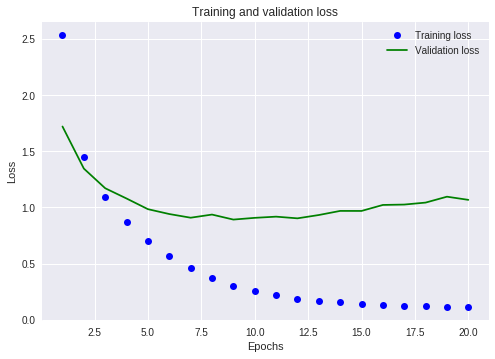

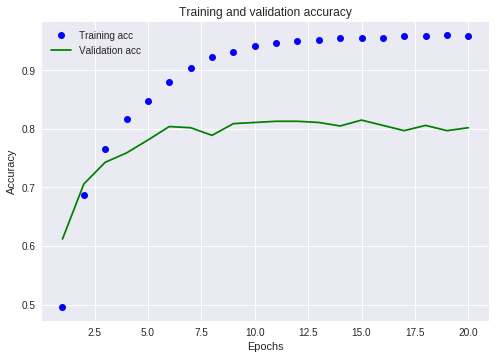

In [25]:

import matplotlib.pyplot as plt

loss_train = history.history['loss']
loss_valid = history.history['val_loss']

acc_train = history.history['acc']
acc_valid = history.history['val_acc']

epochs = range(1, len(loss_train) + 1)

plt.clf()
plt.plot(epochs, loss_train, 'bo', label='Training loss')
plt.plot(epochs, loss_valid, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc_train, 'bo', label='Training acc')
plt.plot(epochs, acc_valid, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see that after $5$th epoch the validation accuracy stabilizes while training accuracy still grows. Let's build a model with a shorter learning process.

In [26]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))
model2.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model2.fit(x_train_train, y_train_train, epochs=9, batch_size=512, validation_data=(x_train_rest, y_train_rest))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 108us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 71us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 68us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 66us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 65us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
798

In [27]:
results = model2.evaluate(x_test, y_test)
print(results)

2246/2246 [==============================] - 0s 136us/step
[1.022498287691777, 0.7756010686194165]


The result is good for such a complex classification task and simple input space. Author got here almotst $80\%$ what is really interesting.

Now we can see what would happen, if we took the second layer to be much smaller - we generate a bottleneck effect.

In [28]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(4, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))
model3.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model3.fit(x_train_train, y_train_train, epochs=20, batch_size=128, validation_data=(x_train_rest, y_train_rest))
results3 = model3.evaluate(x_test, y_test)
print(results3)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 150us/step - loss: 3.1696 - acc: 0.2433 - val_loss: 2.6142 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 1s 104us/step - loss: 2.0606 - acc: 0.5461 - val_loss: 1.7033 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.5012 - acc: 0.6233 - val_loss: 1.5122 - val_acc: 0.6390
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.2887 - acc: 0.6907 - val_loss: 1.4120 - val_acc: 0.6780
Epoch 5/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.1457 - acc: 0.7159 - val_loss: 1.3673 - val_acc: 0.6830
Epoch 6/20
7982/7982 [==============================] - 1s 104us/step - loss: 1.0403 - acc: 0.7313 - val_loss: 1.3424 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.9587 - acc: 0.7422 - val_loss: 1.3388 - val_acc: 0.7010
Ep

7982/7982 [==============================] - 1s 95us/step - loss: 0.7670 - acc: 0.7890 - val_loss: 1.3728 - val_acc: 0.7110
Epoch 11/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.7128 - acc: 0.8052 - val_loss: 1.3971 - val_acc: 0.7160
Epoch 12/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.6672 - acc: 0.8170 - val_loss: 1.4007 - val_acc: 0.7210
Epoch 13/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.6231 - acc: 0.8301 - val_loss: 1.4599 - val_acc: 0.7180
Epoch 14/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.5860 - acc: 0.8366 - val_loss: 1.4702 - val_acc: 0.7210
Epoch 15/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.5521 - acc: 0.8459 - val_loss: 1.5118 - val_acc: 0.7170
Epoch 16/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.5228 - acc: 0.8557 - val_loss: 1.5592 - val_acc: 0.7160
Epoch 17/20
7982/7982 [==============================] - 1s 

7982/7982 [==============================] - 1s 96us/step - loss: 0.4462 - acc: 0.8845 - val_loss: 1.6695 - val_acc: 0.7160
Epoch 20/20
2246/2246 [==============================] - 0s 137us/step
[1.9634437153409448, 0.6905609973285841]


We see that the results are much worse as the network is not able to learn all the patterns.

But what if we add an additional layer? Will it improve the performance?

In [29]:
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))
model4.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model4.fit(x_train_train, y_train_train, epochs=20, batch_size=512, validation_data=(x_train_rest, y_train_rest))
results4 = model4.evaluate(x_test, y_test)
print(results4)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 110us/step - loss: 2.6174 - acc: 0.4446 - val_loss: 1.7360 - val_acc: 0.6090
Epoch 2/20
7982/7982 [==============================] - 0s 62us/step - loss: 1.4645 - acc: 0.6833 - val_loss: 1.3705 - val_acc: 0.6760
Epoch 3/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.1140 - acc: 0.7404 - val_loss: 1.1924 - val_acc: 0.7300
Epoch 4/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.9031 - acc: 0.7904 - val_loss: 1.1012 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.7356 - acc: 0.8315 - val_loss: 1.0718 - val_acc: 0.7600
Epoch 6/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.5923 - acc: 0.8637 - val_loss: 1.0537 - val_acc: 0.7760
Epoch 7/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.4879 - acc: 0.8884 - val_loss: 0.9996 - val_acc: 0.7850
Epoch 

7982/7982 [==============================] - 1s 65us/step - loss: 0.2015 - acc: 0.9498 - val_loss: 1.0554 - val_acc: 0.8030
Epoch 13/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1725 - acc: 0.9553 - val_loss: 1.1202 - val_acc: 0.7910
Epoch 14/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1675 - acc: 0.9545 - val_loss: 1.1538 - val_acc: 0.7810
Epoch 15/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1555 - acc: 0.9565 - val_loss: 1.1277 - val_acc: 0.7920
Epoch 16/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.1442 - acc: 0.9563 - val_loss: 1.1210 - val_acc: 0.7980
Epoch 17/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.1351 - acc: 0.9559 - val_loss: 1.1308 - val_acc: 0.7970
Epoch 18/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.1327 - acc: 0.9574 - val_loss: 1.2036 - val_acc: 0.7860
Epoch 19/20
7982/7982 [==============================] - 1s 

We see that the network overfits now really quickly as it learns patterns exclusive to the training set not general rules.

What about one less layer?

In [30]:
model5 = models.Sequential()
model5.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(46, activation='softmax'))
model5.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model5.fit(x_train_train, y_train_train, epochs=20, batch_size=512, validation_data=(x_train_rest, y_train_rest))
results5 = model5.evaluate(x_test, y_test)
print(results5)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 111us/step - loss: 2.6539 - acc: 0.5426 - val_loss: 1.8759 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.5233 - acc: 0.7134 - val_loss: 1.3931 - val_acc: 0.7270
Epoch 3/20
7982/7982 [==============================] - 0s 62us/step - loss: 1.1008 - acc: 0.7815 - val_loss: 1.1669 - val_acc: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.8528 - acc: 0.8321 - val_loss: 1.0288 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.6823 - acc: 0.8638 - val_loss: 0.9496 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.5574 - acc: 0.8908 - val_loss: 0.8999 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.4602 - acc: 0.9124 - val_loss: 0.8667 - val_acc: 0.8180
Epoch 

7982/7982 [==============================] - 1s 64us/step - loss: 0.2085 - acc: 0.9480 - val_loss: 0.8353 - val_acc: 0.8280
Epoch 13/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.1840 - acc: 0.9518 - val_loss: 0.8356 - val_acc: 0.8210
Epoch 14/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.1648 - acc: 0.9531 - val_loss: 0.8613 - val_acc: 0.8140
Epoch 15/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1508 - acc: 0.9548 - val_loss: 0.8714 - val_acc: 0.8160
Epoch 16/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.1401 - acc: 0.9564 - val_loss: 0.8679 - val_acc: 0.8130
Epoch 17/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.1299 - acc: 0.9573 - val_loss: 0.8831 - val_acc: 0.8160
Epoch 18/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.1222 - acc: 0.9569 - val_loss: 0.8965 - val_acc: 0.8230
Epoch 19/20
7982/7982 [==============================] - 1s 

We acutally see that this one got better results than the architecture proposed by the author scoring almost $80\%$ - the score given by the author as the top score of the two-layered network.

But we can check also, if shorter learning process will help.

In [34]:
model6 = models.Sequential()
model6.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(46, activation='softmax'))
model6.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['acc'])
model6.fit(x_train_train, y_train_train, epochs=10, batch_size=512, validation_data=(x_train_rest, y_train_rest))
results6 = model6.evaluate(x_test, y_test)
print(results6)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 147us/step - loss: 2.6895 - acc: 0.5495 - val_loss: 1.9245 - val_acc: 0.6570
Epoch 2/10
7982/7982 [==============================] - 0s 60us/step - loss: 1.5548 - acc: 0.7159 - val_loss: 1.4232 - val_acc: 0.7140
Epoch 3/10
7982/7982 [==============================] - 0s 62us/step - loss: 1.1210 - acc: 0.7803 - val_loss: 1.1718 - val_acc: 0.7580
Epoch 4/10
7982/7982 [==============================] - 1s 64us/step - loss: 0.8657 - acc: 0.8292 - val_loss: 1.0346 - val_acc: 0.7870
Epoch 5/10
7982/7982 [==============================] - 1s 66us/step - loss: 0.6921 - acc: 0.8654 - val_loss: 0.9519 - val_acc: 0.8030
Epoch 6/10
7982/7982 [==============================] - 1s 64us/step - loss: 0.5622 - acc: 0.8911 - val_loss: 0.9029 - val_acc: 0.8120
Epoch 7/10
7982/7982 [==============================] - 1s 64us/step - loss: 0.4630 - acc: 0.9073 - val_loss: 0.8615 - val_acc: 0.8200
Epoch 

Not much, but better. *p*-hacking anyway.

## Boston houses
The task now is not a catogorization, but regression. The data is a very small set of $404$ training samples and $102$ test samples. The data is in general in bad shape. It will give us a hard time. In the begining we normalize it by subtracting ist mean and dividing by its standard deviation.

In [35]:
from keras.datasets import boston_housing
(train_data_boston, train_targets_boston), (test_data_boston, test_targets_boston) = boston_housing.load_data()
print(train_data_boston.shape)
print(train_targets_boston.shape)

57344/57026 [==============================] - 0s 1us/step
(404, 13)
(404,)


In [37]:
mean_boston = train_data_boston.mean(axis=0)
std_boston = train_data_boston.std(axis=0)

train_data_boston -= mean_boston
train_data_boston /= std_boston

test_data_boston -= mean_boston
test_data_boston /= std_boston
print(train_data_boston[:3])

[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]]


We build again simple densly conected model. What it interesting is that now, we have different loss function and metrics. The new loss function is *mean squared error* and the metric is *mean absolute error*. Both suitable for continous-valued output.

In [38]:
from keras import models
from keras import layers

def build_model_boston(units=[64,64]):
    model = models.Sequential()
    for unit_number in units:
        model.add(layers.Dense(unit_number, activation='relu', input_shape=(train_data_boston.shape[1],)))
    model.add(layers.Dense(1))
    model.compile( optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

test_model_boston = build_model_boston()
print(test_model_boston.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


As we have very little data, we need to squeeze everything we got from it. We use *k-folding* to do so.

In [41]:
import numpy as np
k = 4
num_val_samples = len(train_data_boston)//4
num_epochs_boston = 200
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data_boston = train_data_boston[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets_boston = train_targets_boston[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data_boston[:i *num_val_samples], train_data_boston[(i + 1) * num_val_samples:]],
        axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets_boston[:i *num_val_samples], train_targets_boston[(i + 1) * num_val_samples:]],
        axis = 0)
    
    model_boston = build_model_boston()
    history_boston = model_boston.fit(partial_train_data, partial_train_targets, epochs = num_epochs_boston, batch_size = 1, verbose = 0,
                       validation_data=(val_data_boston, val_targets_boston))
    mae_history = history_boston.history['val_mean_absolute_error']
    all_scores.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
avarage_mae_history = [ np.mean([x[i] for x in all_scores]) for i in range(num_epochs) ]

We can check how did the network behave during the learning process.

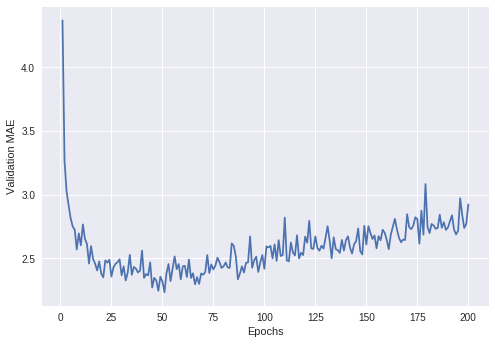

In [43]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(range(1, len(avarage_mae_history) + 1), avarage_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

This plot gives us little insight. We can smooth it out and drop the first 10 epochs as they generate huge error.

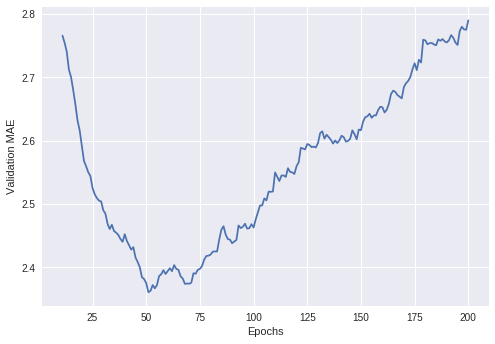

In [44]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point* (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(avarage_mae_history[10:])

plt.clf()
plt.plot(range(11, len(smooth_mae_history) + 11), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

We see that after approximatelly 70 epochs the network begins to overfit. Thanks to that we can build a better model.

In [46]:
model_boston2 = build_model_boston()
history_boston2 = model_boston2.fit(train_data_boston, train_targets_boston, epochs = 50, batch_size = 1)
results_boston = model_boston2.evaluate(test_data_boston, test_targets_boston)
print(results_boston)

Epoch 1/50
404/404 [==============================] - 3s 6ms/step - loss: 199.3171 - mean_absolute_error: 10.5207
Epoch 2/50
404/404 [==============================] - 2s 6ms/step - loss: 28.5236 - mean_absolute_error: 3.6564
Epoch 3/50
404/404 [==============================] - 2s 6ms/step - loss: 20.8767 - mean_absolute_error: 3.0553
Epoch 4/50
404/404 [==============================] - 2s 6ms/step - loss: 17.3959 - mean_absolute_error: 2.8190
Epoch 5/50
404/404 [==============================] - 2s 6ms/step - loss: 14.9718 - mean_absolute_error: 2.5669
Epoch 6/50
353/404 [=========================>....] - ETA: 0s - loss: 14.8373 - mean_absolute_error: 2.5161

404/404 [==============================] - 2s 6ms/step - loss: 13.9233 - mean_absolute_error: 2.4671
Epoch 7/50
404/404 [==============================] - 2s 6ms/step - loss: 13.1339 - mean_absolute_error: 2.4172
Epoch 8/50
404/404 [==============================] - 2s 5ms/step - loss: 12.3548 - mean_absolute_error: 2.3324
Epoch 9/50
404/404 [==============================] - 2s 6ms/step - loss: 11.8918 - mean_absolute_error: 2.2934
Epoch 10/50
404/404 [==============================] - 2s 6ms/step - loss: 11.4191 - mean_absolute_error: 2.2498
Epoch 11/50
404/404 [==============================] - 2s 6ms/step - loss: 10.9985 - mean_absolute_error: 2.2317
Epoch 12/50
  1/404 [..............................] - ETA: 3s - loss: 13.0694 - mean_absolute_error: 3.6152

404/404 [==============================] - 2s 6ms/step - loss: 10.3225 - mean_absolute_error: 2.1758
Epoch 13/50
404/404 [==============================] - 2s 6ms/step - loss: 10.3811 - mean_absolute_error: 2.1825
Epoch 14/50
404/404 [==============================] - 2s 6ms/step - loss: 9.9368 - mean_absolute_error: 2.1306
Epoch 15/50
404/404 [==============================] - 2s 6ms/step - loss: 10.1086 - mean_absolute_error: 2.1345
Epoch 16/50
404/404 [==============================] - 2s 6ms/step - loss: 9.5477 - mean_absolute_error: 2.0865
Epoch 17/50
374/404 [==========================>...] - ETA: 0s - loss: 9.4120 - mean_absolute_error: 1.9944

404/404 [==============================] - 2s 6ms/step - loss: 9.1538 - mean_absolute_error: 1.9946
Epoch 18/50
404/404 [==============================] - 2s 6ms/step - loss: 8.9762 - mean_absolute_error: 2.0726
Epoch 19/50
404/404 [==============================] - 2s 6ms/step - loss: 9.3774 - mean_absolute_error: 2.0206
Epoch 20/50
404/404 [==============================] - 2s 6ms/step - loss: 9.0943 - mean_absolute_error: 2.0211
Epoch 21/50
404/404 [==============================] - 2s 6ms/step - loss: 8.7160 - mean_absolute_error: 1.9735
Epoch 22/50
404/404 [==============================] - 2s 6ms/step - loss: 8.6730 - mean_absolute_error: 1.9900
Epoch 23/50
 29/404 [=>............................] - ETA: 2s - loss: 3.3369 - mean_absolute_error: 1.2825

404/404 [==============================] - 2s 6ms/step - loss: 8.2816 - mean_absolute_error: 1.9658
Epoch 24/50
404/404 [==============================] - 2s 6ms/step - loss: 8.2838 - mean_absolute_error: 1.9423
Epoch 25/50
404/404 [==============================] - 2s 6ms/step - loss: 8.1360 - mean_absolute_error: 1.9013
Epoch 26/50
404/404 [==============================] - 2s 6ms/step - loss: 8.3768 - mean_absolute_error: 1.9011
Epoch 27/50
404/404 [==============================] - 2s 6ms/step - loss: 7.7391 - mean_absolute_error: 1.8795
Epoch 28/50
404/404 [==============================] - 2s 6ms/step - loss: 7.9231 - mean_absolute_error: 1.8528


Epoch 29/50
404/404 [==============================] - 2s 6ms/step - loss: 7.7294 - mean_absolute_error: 1.8431
Epoch 30/50
404/404 [==============================] - 2s 6ms/step - loss: 7.8198 - mean_absolute_error: 1.8471
Epoch 31/50
404/404 [==============================] - 2s 6ms/step - loss: 7.7070 - mean_absolute_error: 1.8114
Epoch 32/50
404/404 [==============================] - 2s 6ms/step - loss: 7.3056 - mean_absolute_error: 1.7818
Epoch 33/50
404/404 [==============================] - 2s 6ms/step - loss: 7.5471 - mean_absolute_error: 1.7762
Epoch 34/50
371/404 [==========================>...] - ETA: 0s - loss: 7.3944 - mean_absolute_error: 1.7812

404/404 [==============================] - 2s 6ms/step - loss: 7.3136 - mean_absolute_error: 1.7715
Epoch 35/50
404/404 [==============================] - 2s 6ms/step - loss: 7.2956 - mean_absolute_error: 1.7445
Epoch 36/50
404/404 [==============================] - 2s 6ms/step - loss: 7.3923 - mean_absolute_error: 1.7747
Epoch 37/50
404/404 [==============================] - 2s 6ms/step - loss: 7.1794 - mean_absolute_error: 1.7664
Epoch 38/50
404/404 [==============================] - 2s 6ms/step - loss: 6.8874 - mean_absolute_error: 1.7318
Epoch 39/50
404/404 [==============================] - 2s 6ms/step - loss: 6.6456 - mean_absolute_error: 1.7363
Epoch 40/50
 30/404 [=>............................] - ETA: 2s - loss: 3.5161 - mean_absolute_error: 1.3718

404/404 [==============================] - 2s 6ms/step - loss: 6.9589 - mean_absolute_error: 1.6922
Epoch 41/50
404/404 [==============================] - 2s 6ms/step - loss: 6.5935 - mean_absolute_error: 1.6774
Epoch 42/50
404/404 [==============================] - 2s 6ms/step - loss: 6.6487 - mean_absolute_error: 1.7197
Epoch 43/50
404/404 [==============================] - 2s 6ms/step - loss: 6.4441 - mean_absolute_error: 1.6809
Epoch 44/50
404/404 [==============================] - 2s 6ms/step - loss: 6.5530 - mean_absolute_error: 1.6911
Epoch 45/50
404/404 [==============================] - 2s 6ms/step - loss: 6.6671 - mean_absolute_error: 1.6548
Epoch 46/50
 11/404 [..............................] - ETA: 2s - loss: 3.1530 - mean_absolute_error: 1.1184

404/404 [==============================] - 2s 6ms/step - loss: 6.3386 - mean_absolute_error: 1.6644
Epoch 47/50
404/404 [==============================] - 2s 6ms/step - loss: 6.5374 - mean_absolute_error: 1.6522
Epoch 48/50
404/404 [==============================] - 2s 6ms/step - loss: 6.7957 - mean_absolute_error: 1.6366
Epoch 49/50
404/404 [==============================] - 2s 6ms/step - loss: 6.2229 - mean_absolute_error: 1.6674
Epoch 50/50
102/102 [==============================] - 0s 2ms/step
[18.30237564386106, 2.728666866526884]


In [47]:
model_boston3 = build_model_boston()
history_boston3 = model_boston3.fit(train_data_boston, train_targets_boston, epochs = 70, batch_size = 1)
results_boston3 = model_boston3.evaluate(test_data_boston, test_targets_boston)
print(results_boston3)

Epoch 1/70
404/404 [==============================] - 3s 7ms/step - loss: 172.6805 - mean_absolute_error: 9.2086
Epoch 2/70
404/404 [==============================] - 2s 6ms/step - loss: 25.7849 - mean_absolute_error: 3.3268
Epoch 3/70
404/404 [==============================] - 2s 6ms/step - loss: 18.9752 - mean_absolute_error: 2.7901
Epoch 4/70
404/404 [==============================] - 2s 6ms/step - loss: 16.0270 - mean_absolute_error: 2.5554
Epoch 5/70
404/404 [==============================] - 2s 6ms/step - loss: 14.1319 - mean_absolute_error: 2.4725
Epoch 6/70
378/404 [===========================>..] - ETA: 0s - loss: 12.2646 - mean_absolute_error: 2.4219

404/404 [==============================] - 2s 6ms/step - loss: 12.9007 - mean_absolute_error: 2.4181
Epoch 7/70
404/404 [==============================] - 2s 6ms/step - loss: 11.8383 - mean_absolute_error: 2.2665
Epoch 8/70
404/404 [==============================] - 2s 6ms/step - loss: 11.8353 - mean_absolute_error: 2.2832
Epoch 9/70
404/404 [==============================] - 2s 6ms/step - loss: 11.1282 - mean_absolute_error: 2.2081
Epoch 10/70
404/404 [==============================] - 2s 6ms/step - loss: 10.7036 - mean_absolute_error: 2.2037
Epoch 11/70
404/404 [==============================] - 2s 6ms/step - loss: 10.2415 - mean_absolute_error: 2.1888
Epoch 12/70
 29/404 [=>............................] - ETA: 2s - loss: 31.5732 - mean_absolute_error: 3.3597

404/404 [==============================] - 2s 6ms/step - loss: 10.2092 - mean_absolute_error: 2.1197
Epoch 13/70
404/404 [==============================] - 2s 6ms/step - loss: 9.9136 - mean_absolute_error: 2.1518
Epoch 14/70
404/404 [==============================] - 2s 6ms/step - loss: 9.4869 - mean_absolute_error: 2.0621
Epoch 15/70
404/404 [==============================] - 2s 6ms/step - loss: 8.9269 - mean_absolute_error: 2.0333
Epoch 16/70
404/404 [==============================] - 2s 6ms/step - loss: 9.0364 - mean_absolute_error: 2.0372
Epoch 17/70
384/404 [===========================>..] - ETA: 0s - loss: 9.0959 - mean_absolute_error: 2.0232

404/404 [==============================] - 2s 6ms/step - loss: 8.9304 - mean_absolute_error: 2.0155
Epoch 18/70
404/404 [==============================] - 2s 6ms/step - loss: 8.8143 - mean_absolute_error: 1.9891
Epoch 19/70
404/404 [==============================] - 2s 6ms/step - loss: 8.6435 - mean_absolute_error: 2.0310
Epoch 20/70
404/404 [==============================] - 2s 6ms/step - loss: 8.5114 - mean_absolute_error: 1.9281
Epoch 21/70
404/404 [==============================] - 2s 6ms/step - loss: 8.5967 - mean_absolute_error: 1.9089
Epoch 22/70
404/404 [==============================] - 2s 6ms/step - loss: 8.2811 - mean_absolute_error: 1.8510
Epoch 23/70
 31/404 [=>............................] - ETA: 2s - loss: 7.3092 - mean_absolute_error: 2.2627

404/404 [==============================] - 2s 6ms/step - loss: 8.0582 - mean_absolute_error: 1.8920
Epoch 24/70
404/404 [==============================] - 2s 6ms/step - loss: 7.7080 - mean_absolute_error: 1.8743
Epoch 25/70
404/404 [==============================] - 2s 6ms/step - loss: 6.9995 - mean_absolute_error: 1.7847
Epoch 26/70
404/404 [==============================] - 2s 6ms/step - loss: 7.7893 - mean_absolute_error: 1.8692
Epoch 27/70
404/404 [==============================] - 2s 6ms/step - loss: 7.5979 - mean_absolute_error: 1.8020
Epoch 28/70
396/404 [============================>.] - ETA: 0s - loss: 7.4605 - mean_absolute_error: 1.8550

404/404 [==============================] - 2s 6ms/step - loss: 7.4530 - mean_absolute_error: 1.8547
Epoch 29/70
404/404 [==============================] - 2s 6ms/step - loss: 7.0137 - mean_absolute_error: 1.8211
Epoch 30/70
404/404 [==============================] - 2s 6ms/step - loss: 7.2685 - mean_absolute_error: 1.8210
Epoch 31/70
404/404 [==============================] - 2s 6ms/step - loss: 7.1427 - mean_absolute_error: 1.7836
Epoch 32/70
404/404 [==============================] - 2s 6ms/step - loss: 6.9311 - mean_absolute_error: 1.7436
Epoch 33/70
404/404 [==============================] - 2s 6ms/step - loss: 6.8021 - mean_absolute_error: 1.7477
Epoch 34/70
 29/404 [=>............................] - ETA: 2s - loss: 2.6023 - mean_absolute_error: 1.3113

404/404 [==============================] - 2s 6ms/step - loss: 6.7855 - mean_absolute_error: 1.7517
Epoch 35/70
404/404 [==============================] - 2s 6ms/step - loss: 6.7056 - mean_absolute_error: 1.6737
Epoch 36/70
404/404 [==============================] - 2s 6ms/step - loss: 6.5779 - mean_absolute_error: 1.7477
Epoch 37/70
404/404 [==============================] - 2s 6ms/step - loss: 7.2457 - mean_absolute_error: 1.7549
Epoch 38/70
404/404 [==============================] - 2s 6ms/step - loss: 6.5005 - mean_absolute_error: 1.7004
Epoch 39/70
397/404 [============================>.] - ETA: 0s - loss: 6.3476 - mean_absolute_error: 1.7381

404/404 [==============================] - 2s 6ms/step - loss: 6.3045 - mean_absolute_error: 1.7294
Epoch 40/70
404/404 [==============================] - 2s 6ms/step - loss: 6.6998 - mean_absolute_error: 1.6878
Epoch 41/70
404/404 [==============================] - 2s 6ms/step - loss: 5.8852 - mean_absolute_error: 1.6818
Epoch 42/70
404/404 [==============================] - 2s 6ms/step - loss: 6.2674 - mean_absolute_error: 1.7076
Epoch 43/70
404/404 [==============================] - 2s 6ms/step - loss: 6.1808 - mean_absolute_error: 1.6453
Epoch 44/70
404/404 [==============================] - 2s 6ms/step - loss: 6.3711 - mean_absolute_error: 1.6504
Epoch 45/70
 38/404 [=>............................] - ETA: 2s - loss: 2.2072 - mean_absolute_error: 1.1634

404/404 [==============================] - 2s 6ms/step - loss: 6.1632 - mean_absolute_error: 1.6510
Epoch 46/70
404/404 [==============================] - 2s 6ms/step - loss: 6.0486 - mean_absolute_error: 1.6598
Epoch 47/70
404/404 [==============================] - 2s 6ms/step - loss: 5.7817 - mean_absolute_error: 1.6070
Epoch 48/70
404/404 [==============================] - 2s 6ms/step - loss: 5.8715 - mean_absolute_error: 1.6144
Epoch 49/70
404/404 [==============================] - 2s 6ms/step - loss: 5.7991 - mean_absolute_error: 1.5870
Epoch 50/70
404/404 [==============================] - 2s 6ms/step - loss: 5.7944 - mean_absolute_error: 1.6188


Epoch 51/70
404/404 [==============================] - 2s 6ms/step - loss: 5.6437 - mean_absolute_error: 1.6197
Epoch 52/70
404/404 [==============================] - 2s 6ms/step - loss: 5.9685 - mean_absolute_error: 1.6744
Epoch 53/70
404/404 [==============================] - 2s 6ms/step - loss: 5.6371 - mean_absolute_error: 1.5636
Epoch 54/70
404/404 [==============================] - 2s 6ms/step - loss: 5.6849 - mean_absolute_error: 1.5659
Epoch 55/70
404/404 [==============================] - 2s 6ms/step - loss: 5.1654 - mean_absolute_error: 1.5519
Epoch 56/70
364/404 [==========================>...] - ETA: 0s - loss: 5.0888 - mean_absolute_error: 1.5526

404/404 [==============================] - 2s 6ms/step - loss: 5.3002 - mean_absolute_error: 1.5750
Epoch 57/70
404/404 [==============================] - 2s 6ms/step - loss: 5.4714 - mean_absolute_error: 1.5268
Epoch 58/70
404/404 [==============================] - 2s 6ms/step - loss: 5.5915 - mean_absolute_error: 1.5941
Epoch 59/70
404/404 [==============================] - 2s 6ms/step - loss: 5.2301 - mean_absolute_error: 1.5509
Epoch 60/70
404/404 [==============================] - 2s 6ms/step - loss: 5.1683 - mean_absolute_error: 1.5262
Epoch 61/70
404/404 [==============================] - 2s 6ms/step - loss: 5.1896 - mean_absolute_error: 1.5231
Epoch 62/70
 20/404 [>.............................] - ETA: 2s - loss: 0.8580 - mean_absolute_error: 0.7977

404/404 [==============================] - 2s 6ms/step - loss: 5.2519 - mean_absolute_error: 1.5527
Epoch 63/70
404/404 [==============================] - 2s 6ms/step - loss: 5.1774 - mean_absolute_error: 1.5194
Epoch 64/70
404/404 [==============================] - 2s 6ms/step - loss: 5.4195 - mean_absolute_error: 1.5024
Epoch 65/70
404/404 [==============================] - 2s 6ms/step - loss: 5.0033 - mean_absolute_error: 1.5205
Epoch 66/70
404/404 [==============================] - 2s 5ms/step - loss: 5.2080 - mean_absolute_error: 1.5241
Epoch 67/70
404/404 [==============================] - 2s 6ms/step - loss: 4.5665 - mean_absolute_error: 1.4673
Epoch 68/70
 11/404 [..............................] - ETA: 2s - loss: 2.4419 - mean_absolute_error: 1.3261

404/404 [==============================] - 2s 6ms/step - loss: 4.9921 - mean_absolute_error: 1.5224
Epoch 69/70
404/404 [==============================] - 2s 6ms/step - loss: 4.6534 - mean_absolute_error: 1.5235
Epoch 70/70
102/102 [==============================] - 0s 3ms/step
[17.240299598843443, 2.73118564194324]


Even after this optimalization, we have approximatelly $2700\$$ mean absolute error! 